In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
sp.init_printing()

### Les exemples de code sont là pour vous guider dans la démarche

## Matrice ABCD de l'œil (6pts)

#### En vous référant à la table 3.6 (p. 36) du manuel de cours, calculez la matrice ABCD de l'œil (2pts)

<tr>
    <td> <img src='https://i.imgur.com/LIsZIWo.png' width='250'/> </td>
    <td> <img src='https://i.imgur.com/RPucQE6.png' width='250'/> </td>
</tr>

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
from numpy.linalg import multi_dot
from numpy.linalg import inv
from IPython.display import Image

#1. Matrice ABCD de l oeil
#Valeurs en mm
#air
n1 = 1.0

#cornee
n2 = 1.38
e1 = 0.45
R1c = 7.26
R2c = 5.59

#aqueous humor
n3 = 1.34
e2 = 2.79

#lens
n4 = 1.41
n5 = 1.39
e3 = 4.98
R1l = 8.67
R2l = -6.33

#vitrous humor
n6 = 1.34
d = 24.0
e4 = d-e3 #on veut que l'épaisseur soit le diamètre (cercle) moins l'epaisseur du cristallin

#1.1
#matrice ABCD pour la cornee
m1 = np.array([[1,0],[(n1-n2)/(n2*R1c),n1/n2]]) #interface spherique gauche
m2 = np.array([[1,e1],[0,1]])                   #milieu homogene
m3 = np.array([[1,0],[(n2-n3)/(n3*R2c),n2/n3]]) #interface spherique droit

#matrice ABCD pour laqueous humor
m4 = np.array([[1,e2],[0,1]])

#matrice ABCD pour la lentille
nmoy = (n4+n5)/2                                   #on prend la moyenne des indices dans le cristallin
m5 = np.array([[1,0],[(n3-nmoy)/(nmoy*R1l),n3/nmoy]])
m6 = np.array([[1,e3],[0,1]])
m7 = np.array([[1,0],[(nmoy-n6)/(n6*R2l),nmoy/n6]])

#vitrous humor
m8 = np.array([[1,e4],[0,1]])

#Matrice ABCD de l oeil
M = multi_dot([m8,m7,m6,m5,m4,m3,m2,m1]) # multi_dot permet de pouvoir multiplier plusieurs matrices à la fois
sp.Matrix(M)

⎡-0.119761042659325    19.112841034298 ⎤
⎢                                      ⎥
⎣-0.0433919956599646  0.693678483826786⎦

#### Tracez la courbe de la focale de l'œil en fonction de l'épaisseur du cristallin [lens] (1pt)

Text(0, 0.5, 'f (mm)')

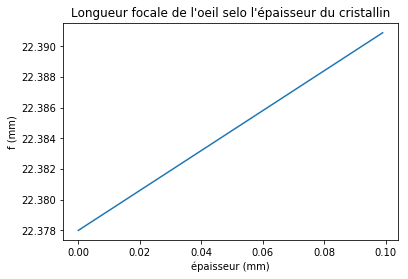

In [4]:
#1.2: Tracez la courbe de la focale de l'œil en fonction de l'épaisseur du cristallin
t = np.arange(0, 0.1, 1/1000)
b = multi_dot([m8,m7])
a = multi_dot([m5,m4,m3,m2,m1])

#On va faire varier la valeur de l'épaisseur 
f1 = []
for i in t:
    m6[(0,1)] = i               #on index à la 1ère ligne, 2e colonne pour changer la valeur de l'épaisseur du cristallin
    Mi = multi_dot([b,m6,a])    #On refait le produit des matrices avec la nouvelle valeur de l'épaisseur pour obtenir la matrice totale
    fi = -1/Mi[(1,0)]           #La valeur de la 2e ligne, 1ère colonne pour la matrice totle  vaut -1/f. On va indexer pour prendre f 
    f1.append(fi)               #On stock la valeur de f et on retourne dans la boucle
plt.plot(t,f1)                  #On obtient le graphique de f en fonction de l'épaisseur du cristallin

plt.title("Longueur focale de l'oeil selo l'épaisseur du cristallin")
plt.xlabel("épaisseur (mm)")
plt.ylabel("f (mm)")

#### Tracez la courbe de la focale de l'œil en fonction de l'indice de réfraction de la cornée (1pt)

Text(0, 0.5, 'f (mm)')

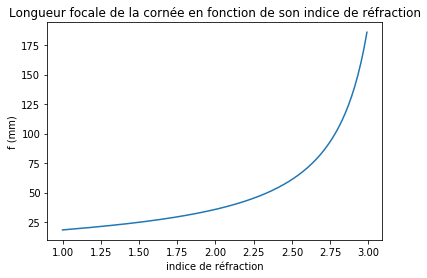

In [5]:
#1.3: Tracez la courbe de la focale de l'œil en fonction de l'indice de réfraction de la cornée 
t=np.arange(1, 3, 1/100)
m6=np.array([[1,e3],[0,1]])
c=multi_dot([m8,m7,m6,m5,m4])

#Même principe que pour #1.2
f2=[]
for j in t:
    m1[(1,0)]=(n1-j)/(j*R1c)      #On va indexer toutes les matrices contenant l'indice n2 pour changer cette valeur et la faire varier
    m1[(1,1)]=n1/j                #dans la boucle
    m3[(1,0)]=(j-n3)/(n3*R2c)
    m3[(1,1)]=j/n3
    Mj=multi_dot([c,m3,m2,m1])
    fj=-1/Mj[(1,0)]
    f2.append(fj)
plt.plot(t,f2)

plt.title("Longueur focale de la cornée en fonction de son indice de réfraction")
plt.xlabel("indice de réfraction")
plt.ylabel("f (mm)")

#### Tracez la courbe de la focale d'une lentille cornéenne [lentille de contact] permettant de corriger la myopie ou l'hypermétropie, en fonction de l'épaisseur du cristallin (2pts)

Text(0, 0.5, 'f (mm)')

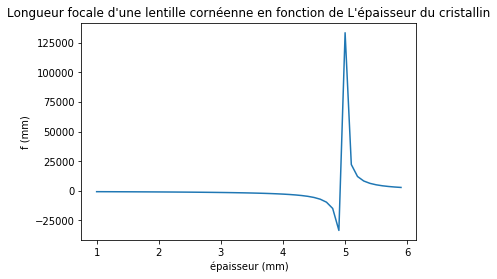

In [20]:
#1.4 Tracez la courbe de la focale d'une lentille cornéenne [lentille de contact] 
     #permettant de corriger la myopie ou l'hypermétropie, en fonction de l'épaisseur du cristallin
    
#Matrice ABCD de l oeil

#air
n1 = 1.0

#cornee
n2 = 1.38
e1 = 0.45
R1c = 7.26
R2c = 5.59

#aqueous humor
n3 = 1.34
e2 = 2.79

#lens
n4 = 1.41
n5 = 1.39
e3 = 4.98
R1l = 8.67
R2l = -6.33

#vitrous humor
n6 = 1.34
d = 24.0
e4 = d-e3 #on veut que l'épaisseur soit le diamètre (cercle) moins l'epaisseur du cristallin

#matrice ABCD pour la cornee
m1 = np.array([[1,0],[(n1-n2)/(n2*R1c),n1/n2]]) #interface spherique gauche
m2 = np.array([[1,e1],[0,1]])                   #milieu homogene
m3 = np.array([[1,0],[(n2-n3)/(n3*R2c),n2/n3]]) #interface spherique droit

#matrice ABCD pour laqueous humor
m4 = np.array([[1,e2],[0,1]])

#matrice ABCD pour la lentille
nmoy = (n4+n5)/2                                   #on prend la moyenne des indices dans le cristallin
m5 = np.array([[1,0],[(n3-nmoy)/(nmoy*R1l),n3/nmoy]])
m6 = np.array([[1,e3],[0,1]])
m7 = np.array([[1,0],[(nmoy-n6)/(n6*R2l),nmoy/n6]])

#vitrous humor
m8 = np.array([[1,e4],[0,1]])

#Matrice ABCD de l oeil
M = multi_dot([m8,m7,m6,m5,m4,m3,m2,m1]) # multi_dot permet de pouvoir multiplier plusieurs matrices à la fois
sp.Matrix(M)
fi = -1/M[1][0]   #La valeur de la 2e ligne, 1ère colonne pour la matrice totale vaut -1/f (oeil normal). On va indexer pour prendre f
 
t = np.arange(1, 6, 1/10)
b = multi_dot([m8,m7])
a = multi_dot([m5,m4,m3,m2,m1])

#On va faire varier la valeur de l'épaisseur 
f = []
for i in t:
    m6[(0,1)] = i                    #on index à la 1ère ligne, 2e colonne pour changer la valeur de l'épaisseur du cristallin
    Mi = multi_dot([b,m6,a])         #On refait le produit des matrices avec la nouvelle valeur de l'épaisseur pour obtenir la matrice totale                 
    F=(Mi[(1,1)]*fi/(fi*Mi[(1,0)]+1)) #longueur focale pour un oeil en santé
    f.append(F)                    #On stock la valeur de f et on retourne dans la boucle
plt.plot(t,f)                       #On obtient le graphique de f en fonction de l'épaisseur du cristallin

plt.title("Longueur focale d'une lentille cornéenne en fonction de L'épaisseur du cristallin")
plt.xlabel("épaisseur (mm)")
plt.ylabel("f (mm)")
    

## Aberrations géométriques (5pts)

#### Tracez les cartes de contours des aberrations géométriques suivantes

##### Astigmatisme (1pt)

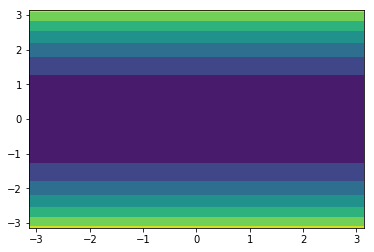

In [7]:
#2.1: Astigmatisme
#On pose S=1 et xi=1 pour toutes les aberrations
vx = np.arange(-np.pi, np.pi, 4/100)
vy = vx
mx, my = np.meshgrid(vx, vy)
mz = np.zeros((len(vx), len(vy)))
for ix in range(len(vx)):
    for iy in range(len(vy)):
        mz[ix,iy] = 1/2*1*1**2*(vx[ix])**2 
plt.contourf(mx, my, mz, cmap=plt.cm.viridis)    

##### Coma (1pt)

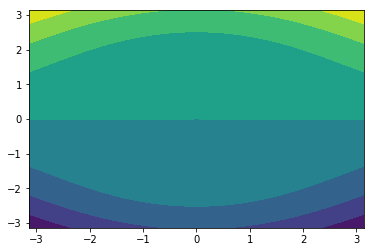

In [8]:
#2.2:coma
vx = np.arange(-np.pi, np.pi, 4/100)
vy = vx
mx, my = np.meshgrid(vx, vy)
mz = np.zeros((len(vx), len(vy)))
for ix in range(len(vx)):
    for iy in range(len(vy)):
        mz[ix,iy] = 1/2*1*1**2*(vx[ix])*((vx[ix])**2+(vy[iy])**2) 
plt.contourf(mx, my, mz, cmap=plt.cm.viridis)

##### Aberration sphérique (1pt)

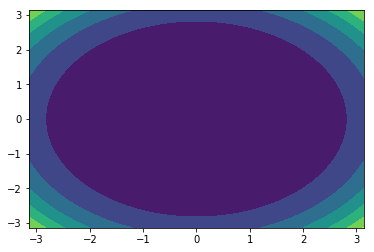

In [9]:
#2.3 Aberration spherique
vx = np.arange(-np.pi, np.pi, 4/100)
vy = vx
mx, my = np.meshgrid(vx, vy)
mz = np.zeros((len(vx), len(vy)))
for ix in range(len(vx)):
    for iy in range(len(vy)):
        mz[ix,iy] = 1/8*1*((vx[ix])**2+(vy[iy])**2)**2
plt.contourf(mx, my, mz, cmap=plt.cm.viridis) 

##### Courbure (1pt)

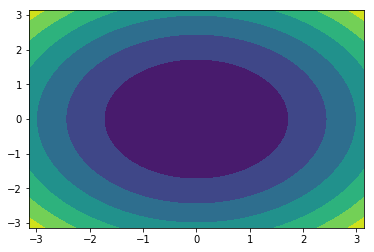

In [10]:
#2.4 Courbure
vx = np.arange(-np.pi, np.pi, 4/100)
vy = vx
mx, my = np.meshgrid(vx, vy)
mz = np.zeros((len(vx), len(vy)))
for ix in range(len(vx)):
    for iy in range(len(vy)):
        mz[ix,iy] = 1/4*(1+1)*1**2*((vx[ix])**2+(vy[iy])**2)
plt.contourf(mx, my, mz, cmap=plt.cm.viridis)

##### Distortion (1pt)

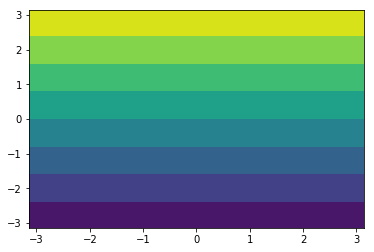

In [11]:
#2.5 Distorsion
vx = np.arange(-np.pi, np.pi, 4/100)
vy = vx
mx, my = np.meshgrid(vx, vy)
mz = np.zeros((len(vx), len(vy)))
for ix in range(len(vx)):
    for iy in range(len(vy)):
        mz[ix,iy] = 1/2*1*1**3*vx[ix]
plt.contourf(mx, my, mz, cmap=plt.cm.viridis)

## Méthode algébrique (6pts)

#### Créez une fonction qui prend en entrée la hauteur par rapport à l'axe optique d'un rayon parallèle à celui-ci, et qui calcule le point d'intersection du rayon réfracté par un dioptre sphérique avec l'axe optique; les autres intrants sont les indices de réfraction n1 et n2 des deux milieus et le rayon de courbure R du dioptre [conventions du cours] (3pts)

In [12]:
#3.1 Creer une fonction
y1 = 0
n1 = 0
n2 = 0
R = 0
f = 0
Q=[]
M=[]
def my_fun(y1,n1,n2,R): #On demande à avoir le rayon, et les indices du milieu.
    P = np.array([[1,0],[(n1-n2)/(n2*R),n1/n2]])
    Q = np.array([[y1],[0]])
    M = np.dot(P,Q)
    f = -y1/(np.tan(M[1][0]))            
    return f

#### En utilisant la fonction Matplotlib tracez le dioptre sphérique et un rayon entrant parallèle à l'axe optique et réfracté sur le dioptre pour n1=1, n2=1.5, et les deux cas R=1 et R=-1. (3pts)

Text(0, 0.5, 'longueur (cm)')

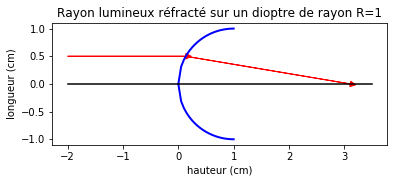

In [13]:
#cas R=1
func1 = my_fun(0.5,1,1.5,1) 
R = 1
y1 = 0.5
so = 2   #distance objet dioptre arbitraire
r1x = np.linspace(-2,0,21)
r1y = np.zeros(21)


Dx = np.linspace(0,1,21)
Dy = np.sqrt(1**2-(Dx-R)**2)
Daox = np.linspace(-2,3.5,21)
Daoy = np.zeros(21)
fig, ax = plt.subplots(1)
ax.plot(Dx, Dy, color="blue", linewidth=2)
ax.plot(Dx, -Dy, color="blue", linewidth=2)
ax.plot(Daox, Daoy, "k-")
ax.set_aspect("equal")

d = 1-(R*np.cos(np.arcsin(y1/R))) #distance entre la courbure du cercle et 0

plt.arrow(-so, y1, so+d, 0, color="red", width=0.003, head_width=0.1, head_length=0.1)
plt.arrow(d, y1, func1, -y1, color="red", width=0.003, head_width=0.1, head_length=0.1)

plt.title("Rayon lumineux réfracté sur un dioptre de rayon R=1")
plt.xlabel("hauteur (cm)")
plt.ylabel("longueur (cm)")

Text(0, 0.5, 'longueur (cm)')

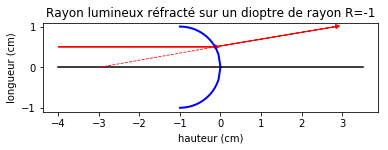

In [14]:
#cas R=-1
func1 = my_fun(0.5,1,1.5,-1) 
R = -1
y1 = 0.5
so = 4   #distance objet dioptre arbitraire

r1x = np.linspace(-2,0,21)
r1y = np.zeros(21)


Dx = np.linspace(-1,0,21)
Dy = np.sqrt(1**2-(Dx-R)**2)
Daox = np.linspace(-4,3.5,21)
Daoy = np.zeros(21)
fig, ax = plt.subplots(1)
ax.plot(Dx, Dy, color="blue", linewidth=2)
ax.plot(Dx, -Dy, color="blue", linewidth=2)
ax.plot(Daox, Daoy, "k-")
ax.set_aspect("equal")

d = 1+(R*np.cos(np.arcsin(y1/R))) #distance entre la courbure du cercle et 0

plt.arrow(-so, y1, so-d, 0, color="red", width=0.003, head_width=0.1, head_length=0.1)
plt.arrow(-d, y1,-func1, y1, color="red", width=0.003, head_width=0.1, head_length=0.1)

fx = np.linspace(func1,-d,21)
fy = np.linspace(0,y1,21)
plt.plot(fx, fy, "r--", linewidth=0.8)

plt.title("Rayon lumineux réfracté sur un dioptre de rayon R=-1")
plt.xlabel("hauteur (cm)")
plt.ylabel("longueur (cm)")

## Tracé de rayons (3pts)

####  Après avoir regardé la vidéo https://www.youtube.com/watch?v=EpIGlexgH6Y, utilisez Matplotlib pour dessiner les points principaux, plans principaux, et points focaux de la vidéo, ainsi que les rayons théoriques passant par les points focaux et points nodaux de la lentille pour un objet de 1cm de haut et situé 3cm à gauche du point focal objet. (3pts)

Text(0, 0.5, 'longueur (cm)')

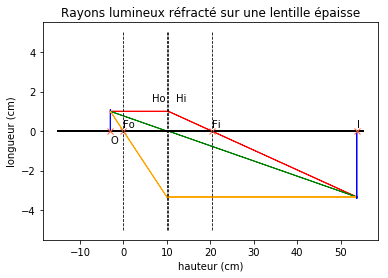

In [15]:
#4. Tracé de rayons 
#valeurs en cm
#l'origine a été défini au foyer objet

#données
n1 = 1    #indice à gauche de la lentille
n2 = 1.5  #indice dans la lentille
n3 = 1    #indice à droite de la lentille

R1 = 10   #rayon de la lentille V1
R2 = -10  #rayon de la lentille V2

d = 1     #épaisseur de la lentille épaisse

yo = 1   #hauteur de l'objet à partir de l'axe optique

pente1 = -1/3
yi = pente1*10   #hauteur de l'image à partir de l'axe optique

ix = (yi-1)*(-10) #distance Hi-image

fo = 10  #distance foyer-objet
fi = 10  #distance foyer-image

#axe optique
aox = np.linspace(-15,55,21)
aoy = np.zeros(21)
plt.plot(aox, aoy, color="black", linestyle="-", linewidth=2)


#Points principaux
H1=plt.text(6.5, 1.5, "Ho", color="black", fontsize=10)
H2=plt.text(12, 1.5, "Hi", color="black", fontsize=10)

Hx1 = np.linspace(10,10,21)
Hy1 = np.linspace(-5,5,21)

Hx2 = np.linspace(10.34,10.34,21)
Hy2 = np.linspace(-5,5,21)

plt.plot(Hx1, Hy1, "k--", linewidth=0.8)
plt.plot(Hx2, Hy2, "k--", linewidth=0.8)

#Points nodaux


#foyer objet
plt.plot(0, 0, color="Tomato", marker="x")
plt.text(0, 0.2, "Fo", color="black", fontsize=10) 
fxo = np.linspace(0,0,21)
fyo = np.linspace(-5,5,21)
plt.plot(fxo, fyo, "k--", linewidth=0.8)

#foyer image
plt.text(20.34, 0.2, "Fi", color="black", fontsize=10) #le foyer image se trouve à 10 cm à droite de la lentille V2
plt.plot(20.34, 0, color="Tomato", marker="x")
fxi=np.linspace(20.34, 20.34,21)
fyi=np.linspace(-5,5,21)
plt.plot(fxi, fyi, "k--", linewidth=0.8)


#objet
plt.arrow(-3, 0, 0, yo, color="blue", width=0.003, head_width=0.1, head_length=0.1)  #L'objet se trouve à 3 cm du point focal objet
plt.text(-3, -0.6, "O", color="black", fontsize=10) #le foyer image se trouve à 10 cm à droite de la lentille V2
plt.plot(-3, 0, color="Tomato", marker="x")


#rayon parallèle à l'axe optique (rouge)
plt.arrow(-3, yo, 3+fo+0.34, 0, color="red", width=0.003, head_width=0.1, head_length=0.1)
plt.arrow(fo+0.34, yo, ix, yi-yo, color="red", width=0.003, head_width=0.1, head_length=0.1)


#rayon vers H1 (vert)
plt.arrow(-3, yo, 3+fo, -yo, color="green", width=0.003, head_width=0.1, head_length=0.1)
plt.arrow(3+fo, 0, 0.34, 0, color="green", width=0.003, head_width=0.1, head_length=0.1)
plt.arrow(fo+0.34, 0, ix, yi, color="green", width=0.003, head_width=0.1, head_length=0.1)


#rayon vers le foyer objet (orange)
plt.arrow(-3, yo, fo+3, yi-yo, color="orange", width=0.003, head_width=0.1, head_length=0.1)
plt.arrow(10, yi, ix, 0, color="orange", width=0.003, head_width=0.1, head_length=0.1)

#Image
plt.arrow(ix+fo+0.34, 0, 0, yi, color="blue", width=0.003, head_width=0.1, head_length=0.1)
plt.text(ix+fo+0.34, 0.2, "I", color="black", fontsize=10) #le foyer image se trouve à 10 cm à droite de la lentille V2
plt.plot(ix+fo+0.34, 0, color="Tomato", marker="x")

plt.title("Rayons lumineux réfracté sur une lentille épaisse")
plt.xlabel("hauteur (cm)")
plt.ylabel("longueur (cm)")